In [1]:
#确定数据分析的目标
#对电商行业进行测算
#建立RFM模型进行用户分层

#导入数据
#观测数据
#清洗数据
#指标计算
#数据可视化
#模型建立

In [2]:
#导入
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#导入数据
df = pd.read_excel('./某电商网站订单数据.xlsx', index_col='id')

In [4]:
df

,orderID,userID,goodsID,orderAmount,payment,chanelID,platfromType,orderTime,payTime,chargeback
id,,,,,,,,,,
1,sys-2018-254118088,user-157213,PR000064,272.51,272.51,渠道-0396,APP,2018-02-14 12:20:36,2019-02-28 13:38:41,否
2,sys-2018-263312190,user-191121,PR000583,337.93,337.93,渠道-0765,Wech atMP,2018-08-14 09:40:34,2019-01-01 14:47:14,是
3,sys-2018-188208169,user-211918,PR000082,905.68,891.23,渠道-0530,We c hatMP,2018-11-02 20:17:25,2019-01-19 20:06:35,否
4,sys-2018-203314910,user-201322,PR000302,786.27,688.88,渠道-0530,WEB,2018-11-19 10:36:39,2019-08-07 12:24:35,否
5,sys-2018-283989279,user-120872,PR000290,550.77,542.51,渠道-9527,APP,2018-12-26 11:19:16,2019-10-01 07:42:43,否
...,...,...,...,...,...,...,...,...,...,...
104553,sys-2020-268392025,user-182189,PR000082,186.37,126.21,渠道-0568,Wech atMP,2020-01-01 23:30:57,2020-01-01 23:31:09,否
104554,sys-2020-213140521,user-170057,PR000603,138.81,138.81,渠道-0007,APP,2020-01-01 23:31:26,2020-01-01 23:31:36,否
104555,sys-2020-274536228,user-156592,PR000405,2632.27,2632.27,渠道-0985,Wech atMP,2020-01-01 23:46:56,2020-01-01 23:47:06,否


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104557 entries, 1 to 104557
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   orderID       104557 non-null  object        
 1   userID        104557 non-null  object        
 2   goodsID       104557 non-null  object        
 3   orderAmount   104557 non-null  float64       
 4   payment       104557 non-null  float64       
 5   chanelID      104549 non-null  object        
 6   platfromType  104557 non-null  object        
 7   orderTime     104557 non-null  datetime64[ns]
 8   payTime       104557 non-null  datetime64[ns]
 9   chargeback    104557 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 8.8+ MB


In [6]:
#数据清洗
#1、修改列名
df.rename(columns={'chanelID':'channelID', 'platfromType':'platformType'}, inplace=True)

In [7]:
df.head()

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback
id,,,,,,,,,,
1,sys-2018-254118088,user-157213,PR000064,272.51,272.51,渠道-0396,APP,2018-02-14 12:20:36,2019-02-28 13:38:41,否
2,sys-2018-263312190,user-191121,PR000583,337.93,337.93,渠道-0765,Wech atMP,2018-08-14 09:40:34,2019-01-01 14:47:14,是
3,sys-2018-188208169,user-211918,PR000082,905.68,891.23,渠道-0530,We c hatMP,2018-11-02 20:17:25,2019-01-19 20:06:35,否
4,sys-2018-203314910,user-201322,PR000302,786.27,688.88,渠道-0530,WEB,2018-11-19 10:36:39,2019-08-07 12:24:35,否
5,sys-2018-283989279,user-120872,PR000290,550.77,542.51,渠道-9527,APP,2018-12-26 11:19:16,2019-10-01 07:42:43,否


In [8]:
df.tail()

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback
id,,,,,,,,,,
104553,sys-2020-268392025,user-182189,PR000082,186.37,126.21,渠道-0568,Wech atMP,2020-01-01 23:30:57,2020-01-01 23:31:09,否
104554,sys-2020-213140521,user-170057,PR000603,138.81,138.81,渠道-0007,APP,2020-01-01 23:31:26,2020-01-01 23:31:36,否
104555,sys-2020-274536228,user-156592,PR000405,2632.27,2632.27,渠道-0985,Wech atMP,2020-01-01 23:46:56,2020-01-01 23:47:06,否
104556,sys-2020-279922239,user-173702,PR000387,1206.76,1029.46,渠道-0985,APP,2020-01-01 23:47:01,2020-01-01 23:47:48,否
104557,sys-2020-250738010,user-164299,PR000525,3053.70,2982.26,渠道-0007,APP,2020-01-01 23:48:26,2020-01-01 23:49:44,否


In [9]:
#确定分析时间窗口  选取2019年数据
from datetime import datetime

In [10]:
start = datetime(2019,1,1)
end = datetime(2019,12,31,23,59,59)

In [11]:
df.drop(df[df['orderTime']<start].index, inplace=True)

In [12]:
df.drop(df[df['orderTime']>end].index, inplace=True)

In [13]:
#处理时间异常值
#处理与业务逻辑不符合的异常值
df.drop(df[df.payTime < df.orderTime].index, inplace=True)

In [14]:
#删除订单支付时间大于半小时的订单数据
delta = df.payTime - df.orderTime

In [15]:
df.drop(df[delta.dt.days>0].index, inplace=True)

In [16]:
df.drop(df[delta.dt.seconds>1800].index, inplace=True)

G:\JetBrains\ana\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [17]:
df.drop(df[df.payment<0].index, inplace=True)

In [18]:
df['discount'] = df.payment / df.orderAmount

In [19]:
df[df.discount>1]

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback,discount
id,,,,,,,,,,,
16,sys-2019-322802617,user-125220,PR000812,430.69,4223.476684,渠道-0530,Wech atMP,2019-01-01 07:59:45,2019-01-01 07:59:59,否,9.806303
46,sys-2019-321496315,user-283798,PR000520,1052.36,9449.242956,渠道-0896,APP,2019-01-01 11:23:03,2019-01-01 11:23:17,否,8.979097
66,sys-2019-355823490,user-258709,PR000927,358.94,3580.284755,渠道-9527,AP P,2019-01-01 12:31:55,2019-01-01 12:32:23,否,9.974605
69,sys-2019-277578024,user-223627,PR000830,2331.25,22486.795449,渠道-0530,AP P,2019-01-01 12:37:41,2019-01-01 12:38:20,否,9.645810
148,sys-2019-355060894,user-214122,PR000826,205.78,2044.275720,渠道-0007,APP,2019-01-01 14:44:49,2019-01-01 14:45:21,是,9.934278
...,...,...,...,...,...,...,...,...,...,...,...
104163,sys-2019-378227947,user-241360,PR000581,463.15,4629.168060,渠道-9527,APP,2019-12-31 14:32:32,2019-12-31 14:32:46,否,9.994965
104166,sys-2019-283219085,user-153512,PR000363,1651.02,16282.360600,渠道-0465,APP,2019-12-31 14:45:13,2019-12-31 14:45:36,否,9.862001
104208,sys-2019-318820358,user-170535,PR000739,287.35,2410.784113,渠道-0896,APP,2019-12-31 17:54:15,2019-12-31 17:54:32,是,8.389713


In [20]:
mean_discount = df[df.discount <= 1].discount.mean()

In [21]:
mean_discount

0.9179310544306006

In [22]:
df.discount = df.discount.apply(lambda x : mean_discount if x>1 else x)

In [23]:
df.payment = df.orderAmount * df.discount

In [24]:
df

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback,discount
id,,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,Wech atMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否,1.000000
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,We c hatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否,0.967507
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,Wech atMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否,0.961975
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否,0.952811
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,AL i MP,2019-01-01 01:31:00,2019-01-01 01:31:36,否,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
104297,sys-2019-344079195,user-182248,PR000813,831.29,766.07,渠道-0896,We c hatMP,2019-12-31 23:32:55,2019-12-31 23:33:06,否,0.921544
104298,sys-2019-296195955,user-143322,PR000938,1565.67,1414.89,渠道-0007,APP,2019-12-31 23:33:05,2019-12-31 23:34:36,是,0.903696
104299,sys-2019-382387725,user-220484,PR000782,3326.83,3273.54,渠道-0530,WE B,2019-12-31 23:37:30,2019-12-31 23:37:44,否,0.983982


In [25]:
df.isnull().sum()

orderID         0
userID          0
goodsID         0
orderAmount     0
payment         0
channelID       8
platformType    0
orderTime       0
payTime         0
chargeback      0
discount        0
dtype: int64

In [26]:
#使用众数填充渠道 id [0]：第一个众数
df.fillna(df.channelID.mode()[0], inplace=True)

In [27]:
df.isnull().sum()

orderID         0
userID          0
goodsID         0
orderAmount     0
payment         0
channelID       0
platformType    0
orderTime       0
payTime         0
chargeback      0
discount        0
dtype: int64

In [28]:
df.platformType = df.platformType.str.replace(r'\s',"", regex = True).str.lower()

In [29]:
df

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback,discount
id,,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,wechatmp,2019-01-01 00:12:23,2019-01-01 00:13:37,否,1.000000
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,wechatmp,2019-01-01 00:23:06,2019-01-01 00:23:32,否,0.967507
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,wechatmp,2019-01-01 01:05:50,2019-01-01 01:06:17,否,0.961975
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,app,2019-01-01 01:16:12,2019-01-01 01:16:25,否,0.952811
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,alimp,2019-01-01 01:31:00,2019-01-01 01:31:36,否,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
104297,sys-2019-344079195,user-182248,PR000813,831.29,766.07,渠道-0896,wechatmp,2019-12-31 23:32:55,2019-12-31 23:33:06,否,0.921544
104298,sys-2019-296195955,user-143322,PR000938,1565.67,1414.89,渠道-0007,app,2019-12-31 23:33:05,2019-12-31 23:34:36,是,0.903696
104299,sys-2019-382387725,user-220484,PR000782,3326.83,3273.54,渠道-0530,web,2019-12-31 23:37:30,2019-12-31 23:37:44,否,0.983982


In [30]:
#计算指标
    #GMV：交易总金额
    #总销售额
    #实际销售额


In [31]:
#计算2019年整年度指标

In [32]:
#1.GMV
gmv = df.orderAmount.sum()
print('gmv:',gmv)

gmv: 108527205.98999998


In [34]:
#2.总销售额
sales = df.payment.sum()
# print('sales:',real_sales)

In [35]:
#实际销售额
real_sales = df[df.chargeback == '否'].payment.sum()
print('real_sales:',real_sales)

real_sales: 88940437.70922612


In [36]:
df['month'] = df.orderTime.dt.month

In [37]:
df.month

id
6          1
7          1
8          1
9          1
10         1
          ..
104297    12
104298    12
104299    12
104300    12
104301    12
Name: month, Length: 103348, dtype: int64

In [38]:
gmv_month = round(df.groupby(by = 'month').orderAmount.sum(), 3)
sales_month = round(df.groupby(by = 'month').payment.sum(),3)
real_month = round(df[df.chargeback == '否'].groupby(by = 'month').payment.sum(),3)

In [39]:
real_month

month
1     5761529.007
2     4585805.177
3     5676798.104
4     6052733.015
5     8179511.146
6     8701408.193
7     8299815.522
8     8547221.303
9     7914591.012
10    7614101.538
11    8890150.231
12    8716773.462
Name: payment, dtype: float64

In [40]:
#配置字体参数雅黑
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
#安装字体
plt.rcParams['font.sans-serif'] = 'SimHei'
#配置矢量图
%config InlineBackend.figure_format = 'svg'

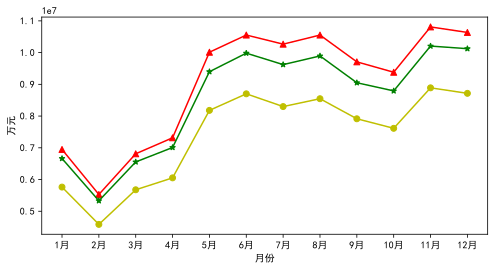

In [41]:
#创建画布
plt.figure(figsize=(8, 4), dpi = 120)
#创建坐标系
ax = plt.subplot(1, 1, 1)
plt.plot(gmv_month.index, gmv_month, color = 'r', label = 'GMV', marker = "^")
plt.plot(sales_month.index, sales_month, color = 'g', label = 'sales', marker = "*")
plt.plot(real_month.index, real_month, color = 'y', label = 'real', marker= "o")
plt.xticks(gmv_month.index, labels=[f'{x}月' for x in gmv_month.index])
plt.xlabel('月份')
plt.ylabel('万元')
plt.show()

In [42]:
import pyecharts.options as opts
from pyecharts.charts import Line
from pyecharts.faker import Faker
from pyecharts.charts import Pie

In [43]:
gmv_month_index = gmv_month.index.to_list()
sales_month_index = sales_month.index.to_list()
real_month_index = real_month.index.to_list()
gmv_month_value = gmv_month.values.tolist()
sales_month_value = sales_month.values.tolist()
real_month_value = real_month.values.tolist()

In [44]:
c = (
    Line()
    .add_xaxis(gmv_month_index)
    .add_yaxis("GMV", gmv_month_value)
    .add_yaxis("sales", sales_month_value)
    .add_yaxis("real", real_month_value)
    .set_global_opts(title_opts=opts.TitleOpts(title="销售金额"))
#     .render("line_base.html")
    .render_notebook()
)

In [45]:
c

In [46]:
#查看各渠道的GMV流量
#绘制饼图

In [47]:
gmv_ser = df.groupby('channelID').orderAmount.sum()

In [48]:
gmv_ser = gmv_ser.nlargest(10)

In [49]:
gmv_ser

channelID
渠道-0896    17312782.80
渠道-9527    13117527.94
渠道-0530    12758609.77
渠道-0765     9602586.49
渠道-0396     8733737.57
渠道-0007     8617937.84
渠道-0985     6568554.04
渠道-0283     6559076.14
渠道-0568     4510473.30
渠道-0168     4371827.57
Name: orderAmount, dtype: float64

In [50]:
channelid_index = gmv_ser.index.to_list()
channelid_value = gmv_ser.values.tolist()

In [51]:
channelid_index

['渠道-0896',
 '渠道-9527',
 '渠道-0530',
 '渠道-0765',
 '渠道-0396',
 '渠道-0007',
 '渠道-0985',
 '渠道-0283',
 '渠道-0568',
 '渠道-0168']

In [52]:
channelid_pie = (
    Pie()
    .add("渠道", [z for z in zip(channelid_index, channelid_value)])
     #全局配置项
    .set_global_opts(title_opts=opts.TitleOpts(title="不同渠道GMV流量"))
    #系列配置项
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    #生成图表
    .render_notebook()
#     .render("pie_base.html")
)

In [53]:
channelid_pie

In [54]:
#周一至周日下单量

In [55]:
df['week'] = df.orderTime.dt.dayofweek

In [56]:
week_count = df.groupby(by='week').orderID

In [57]:
week_order_count = week_count.count()

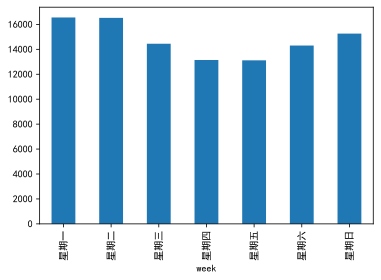

In [58]:
week_order_count.plot(kind='bar')
plt.xticks(week_order_count.index, labels=[f"星期{x}" for x in '一二三四五六日'])
plt.show()

In [79]:
df

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback,discount,month,week,F
id,,,,,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,wechatmp,2019-01-01 00:12:23,2019-01-01 00:13:37,否,1.000000,1,1,1
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,wechatmp,2019-01-01 00:23:06,2019-01-01 00:23:32,否,0.967507,1,1,1
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,wechatmp,2019-01-01 01:05:50,2019-01-01 01:06:17,否,0.961975,1,1,1
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,app,2019-01-01 01:16:12,2019-01-01 01:16:25,否,0.952811,1,1,1
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,alimp,2019-01-01 01:31:00,2019-01-01 01:31:36,否,1.000000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104297,sys-2019-344079195,user-182248,PR000813,831.29,766.07,渠道-0896,wechatmp,2019-12-31 23:32:55,2019-12-31 23:33:06,否,0.921544,12,1,1
104298,sys-2019-296195955,user-143322,PR000938,1565.67,1414.89,渠道-0007,app,2019-12-31 23:33:05,2019-12-31 23:34:36,是,0.903696,12,1,1
104299,sys-2019-382387725,user-220484,PR000782,3326.83,3273.54,渠道-0530,web,2019-12-31 23:37:30,2019-12-31 23:37:44,否,0.983982,12,1,1


In [59]:
#用户的复购率
temp = pd.pivot_table(df, values='orderID', index='userID', columns='month', aggfunc='nunique')

In [60]:
temp

month,1,2,3,4,5,6,7,8,9,10,11,12
userID,,,,,,,,,,,,
user-100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
user-100003,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user-100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
user-100007,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user-100008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
user-299980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
user-299983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
user-299989,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [61]:
def hanle(x):
    if x > 1:
        return 1
    elif x ==1:
        return 0
    else:
        return np.NAN

In [62]:
temp = temp.applymap(hanle)

In [63]:
temp

month,1,2,3,4,5,6,7,8,9,10,11,12
userID,,,,,,,,,,,,
user-100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
user-100003,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user-100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
user-100007,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user-100008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
user-299980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
user-299983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
user-299989,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [64]:
ser = temp.sum()/temp.count()

In [65]:
for i in ser:
    print(i)

0.01826630347700689
0.011412268188302425
0.017425810904071772
0.020200462606013877
0.030539241857981847
0.030531400966183574
0.02522445489525438
0.03163805204621531
0.024718363775566007
0.027911784975878703
0.02911167275109988
0.03084932035091102


In [66]:
#RFM模型建立
#增加购买频率列
df['F'] = 1

In [67]:
temp = pd.pivot_table(df,
                     values=['orderTime', 'payment', 'F'],
                     index='userID',
                      aggfunc={
                          'orderTime':np.max,
                          'payment':np.sum,
                          'F':np.sum
                      }
                     )

In [68]:
temp

,F,orderTime,payment
userID,,,
user-100000,1,2019-10-13 18:46:46,1770.81
user-100003,1,2019-05-24 13:04:05,511.59
user-100006,2,2019-11-14 15:37:19,2771.98
user-100007,1,2019-01-14 18:45:35,2162.14
user-100008,1,2019-11-16 17:15:03,4879.94
...,...,...,...
user-299980,1,2019-10-18 10:53:37,389.44
user-299983,1,2019-12-27 17:57:11,706.80
user-299989,2,2019-11-11 10:40:08,1637.47


In [69]:
temp["R"] = (temp.orderTime - datetime(2019,12,31)).dt.days
temp["M"] = temp.payment
temp = temp[["R", "F", "M"]]

In [70]:
temp

,R,F,M
userID,,,
user-100000,-79,1,1770.81
user-100003,-221,1,511.59
user-100006,-47,2,2771.98
user-100007,-351,1,2162.14
user-100008,-45,1,4879.94
...,...,...,...
user-299980,-74,1,389.44
user-299983,-4,1,706.80
user-299989,-50,2,1637.47


In [71]:
temp = temp.apply(lambda x : x-x.mean())

In [72]:
temp

,R,F,M
userID,,,
user-100000,67.941298,-0.314007,465.926905
user-100003,-74.058702,-0.314007,-793.293095
user-100006,99.941298,0.685993,1467.096905
user-100007,-204.058702,-0.314007,857.256905
user-100008,101.941298,-0.314007,3575.056905
...,...,...,...
user-299980,72.941298,-0.314007,-915.443095
user-299983,142.941298,-0.314007,-598.083095
user-299989,96.941298,0.685993,332.586905


In [73]:
temp_rfm = temp.applymap(lambda x:'1' if x>=0 else '0')

In [74]:
temp_rfm

,R,F,M
userID,,,
user-100000,1,0,1
user-100003,0,0,0
user-100006,1,1,1
user-100007,0,0,1
user-100008,1,0,1
...,...,...,...
user-299980,1,0,0
user-299983,1,0,0
user-299989,1,1,1


In [75]:
def tag(model):
    tags ={
        '111':'重要价值用户',
        '101':'重要发展用户',
        '011':'重要保持用户',
        '001':'重要挽留用户',
        '110':'一般价值用户',
        '010':'一般保持用户',
        '100':'一般发展用户',
        '000':'一般挽留用户',
    }
    key = model['R']+model['F']+model['M']
    return tags[key]
    

In [76]:
temp_rfm['TAG'] = temp_rfm.apply(tag,axis=1)

In [77]:
ser = temp_rfm.groupby('TAG').TAG.count()
ser

TAG
一般价值用户     5182
一般保持用户     1891
一般发展用户    21226
一般挽留用户    24288
重要价值用户     9809
重要保持用户     3230
重要发展用户     5728
重要挽留用户     7297
Name: TAG, dtype: int64

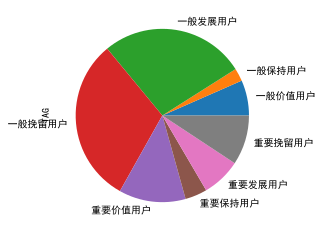

In [78]:
ser.plot(kind='pie')